In [2]:
a = '''
\033[1mProblem Statement\033[1m


RFM analysis is a powerful technique used by companies to better understand customer 
behaviour and optimize engagement strategies. It revolves around three key dimensions: 
recency, frequency, and monetary value. These dimensions capture essential aspects of 
customer transactions, providing valuable information for segmentation and personalized 
marketing campaigns.

The given dataset is provided by an e-commerce platform containing customer transaction 
data including customer ID, purchase date, transaction amount, product information, ID 
command and location. The platform aims to leverage RFM (recency, frequency, monetary value)
analysis to segment customers and optimize customer engagement strategies.

\033[1mYour task is to perform RFM analysis and develop customer segments based on their RFM
scores.The analysis should provide insights into customer behaviour and identification of 
high-value customers,at-risk customers, and potential opportunities for personalized marketing 
campaigns.\033[1m

Reference link:
https://statso.io/rfm-analysis-case-study/
''' 
print(a)



Problem Statement


RFM analysis is a powerful technique used by companies to better understand customer 
behaviour and optimize engagement strategies. It revolves around three key dimensions: 
recency, frequency, and monetary value. These dimensions capture essential aspects of 
customer transactions, providing valuable information for segmentation and personalized 
marketing campaigns.

The given dataset is provided by an e-commerce platform containing customer transaction 
data including customer ID, purchase date, transaction amount, product information, ID 
command and location. The platform aims to leverage RFM (recency, frequency, monetary value)
analysis to segment customers and optimize customer engagement strategies.

Your task is to perform RFM analysis and develop customer segments based on their RFM
scores.The analysis should provide insights into customer behaviour and identification of 
high-value customers,at-risk customers, and potential opportunities for personalized

In [27]:
b = '''
\033[1mReading dataset and arranging the data in their respective columns.
\u2023 This is achieved by using the set_option function set into None and False.
\u2023 This is part of data preparation.\033[0m

'''
print(b)

import pandas as pd

# read the CSV file
data = pd.read_csv("rfm_data.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


# Check the rows of DataFrame
print(data.head(1000))





Reading dataset and arranging the data in their respective columns.
‣ This is achieved by using the set_option function set into None and False.
‣ This is part of data preparation.


     CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  Location
0          8814   2023-04-11             943.31          Product C   890075     Tokyo
1          2188   2023-04-11             463.70          Product A   176819    London
2          4608   2023-04-11              80.28          Product A   340062  New York
3          2559   2023-04-11             221.29          Product A   239145    London
4          9482   2023-04-11             739.56          Product A   194545     Paris
..          ...          ...                ...                ...      ...       ...
995        2970   2023-06-10             759.62          Product B   275284    London
996        6669   2023-06-10             941.50          Product C   987025  New York
997        8836   2023-06-10             5

In [12]:
import pandas as pd

# read the CSV file
data = pd.read_csv("rfm_data.csv")

c = '''

\033[1m Calculating Recency: This is achieved by by calculating the time since the last transaction.\033[1m

\033[1m Algorithm Calculate Recency:\033[1m

\u2022 Create a function that takes argument data, reference  date .
\u2022 The last date in the data set is 2023-06-10. 
\u2022 Define the latestDate by using pandas function to_datatime. latestDate = pd.to_datetime('2023-06-10')
\u2022 Transform PurchaseDate to a PurchaseDate column using pd.to_datetime(data['PurchaseDate'])
\u2022 Calculate Recency by subtracting Purchase date from latest date
\u2022 print the updated data set.
'''

print(c)
# Calculate recency  by crearing a function cal_Recency
#

def cal_Recency(data, ref_date='2023-06-10'):
    latestDate = pd.to_datetime('2023-06-10')
    data['PurchaseDate']= pd.to_datetime(data['PurchaseDate'])
    data['Recency'] = (latestDate - data['PurchaseDate']).dt.days 
    return data

data = cal_Recency(data)
# this calculates the frequency
d = ''' 
\033[1m Calculate frequency: this is done by tabulating the number of transactions per customer.\033[1m

\033[1m Algorithm for Calculating frequency:\033[1m 

\u2022 Define a function named cal_Frequency that takes data argument.
\u2022 Calculate the frequency by regrouping data based on CustomerID column and counting 
  the number of orderID values for each group.
\u2022 Merge frquency data with the original data.
\u2022 Return data if everything is correct. 

'''

def cal_Frequency(data):
    frequencyData = data.groupby('CustomerID')['OrderID'].count().reset_index()
    frequencyData.rename(columns={'OrderID': 'Frequency'}, inplace=True)
    data = data.merge(frequencyData, on='CustomerID', how='left')
    return data

data = cal_Frequency(data)

# This code calculates the monetary

e = '''
\033[1m Calculate Monetary: this daone by calculating the total monetary value of transactions
per customers. \033[1m

\033[1m Algorithm for Calculating Monetary Value:

\u2022 Define the function named cal_Monetary that takes data as the argument.
\u2022 Calculate the TransactionAmount by adding the sum for each group.
\u2022 Merge monetary data with the original data.
\u2022 Return data if everything is correct.

'''

def cal_Monetary(data):
    monetaryData = data.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
    monetaryData.rename(columns={'TransactionAmount': 'Monetary'}, inplace=True)
    data = data.merge(monetaryData, on='CustomerID', how='left')
    return data

data = cal_Monetary(data)
print(d)
print(e)
# print updated recency , frequency and monetary Data Frame columns.
pd.set_option('display.expand_frame_repr', False)
print(data)


# This stage we shall focus on the RFM scores for the data set

f = ''' 
\033[1m \u2023RFM analysis scores for customers on each of the three main factors.Generally, a score from 1 to 5 is given, with 5 being the highest.\033[1m

\033[1m \u2027 At this step we shall use the following steps:
\u2027 Define the scoring data that is a range of 1 - 5, with 1 the lowest and 5 the highest.
\u2027 The third step is to calculate the RFM scores.
\u2027 The final part of tabaulating data is to calculate the Segment score
'''

recencyScores = [1,2,3,4,5]
frequencyScores = [1,2,3,4,5]
monetaryScores = [1,2,3,4,5]

data['RecencyScore'] = pd.qcut(data['Recency'], q=5, labels=False, duplicates='drop') + 1
data['FrequencyScore'] = pd.qcut(data['Frequency'], q=5, labels=False, duplicates='drop') + 1
data['MonetaryScore'] = pd.qcut(data['Monetary'], q=5, labels=False, duplicates='drop') + 1

# The final part of tabaulating data is to calculate the Segment score 
#  Code strucure from https://thecleverprogrammer.com/2023/06/12/rfm-analysis-using-python/



def calculate_rfm_scores(data):
    # Calculate individual RFM scores
    data['RFM_Score'] = data['RecencyScore'] + data['FrequencyScore'] + data['MonetaryScore']
    
    # Create RFM segments
    segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
    data['Value Segment'] = pd.qcut(data['RFM_Score'], q=3, labels=segment_labels)
    
    return data


data = calculate_rfm_scores(data)




# Display the DataFrame with RFM scores

print(f)

pd.set_option('display.expand_frame_repr', None)
print(data)








 Calculating Recency: This is achieved by by calculating the time since the last transaction.

 Algorithm Calculate Recency:

• Create a function that takes argument data, reference  date .
• The last date in the data set is 2023-06-10. 
• Define the latestDate by using pandas function to_datatime. latestDate = pd.to_datetime('2023-06-10')
• Transform PurchaseDate to a PurchaseDate column using pd.to_datetime(data['PurchaseDate'])
• Calculate Recency by subtracting Purchase date from latest date
• print the updated data set.

 
 Calculate frequency: this is done by tabulating the number of transactions per customer.

 Algorithm for Calculating frequency: 

• Define a function named cal_Frequency that takes data argument.
• Calculate the frequency by regrouping data based on CustomerID column and counting 
  the number of orderID values for each group.
• Merge frquency data with the original data.
• Return data if everything is correct. 



 Calculate Monetary: this daone by calculati

/home/x38fed/.local/lib/python3.11/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



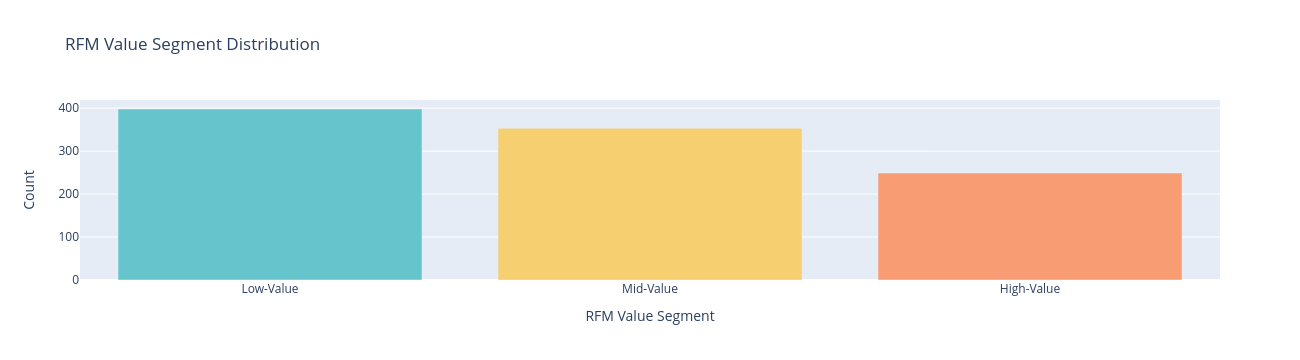

In [20]:
import plotly.express as px

def plot_rfm_segment_distribution(data):
    # Calculate the counts of each RFM segment
    segment_counts = data['Value Segment'].value_counts().reset_index()
    segment_counts.columns = ['Value Segment', 'Count']

    # Define colors for the segments
    pastel_colors = px.colors.qualitative.Pastel

    # Create the bar chart
    fig_segment_dist = px.bar(segment_counts, x='Value Segment', y='Count', 
                              color='Value Segment', color_discrete_sequence=pastel_colors,
                              title='RFM Value Segment Distribution')

    # Update the layout
    fig_segment_dist.update_layout(xaxis_title='RFM Value Segment',
                                  yaxis_title='Count',
                                  showlegend=False)

    # Show or return the chart, depending on your needs
    return fig_segment_dist

# Example usage:
fig = plot_rfm_segment_distribution(data)
fig.show()  # To display the chart


     CustomerID RFM Customer Segments
0          8814             Champions
1          2188             Champions
2          4608   Potential Loyalists
3          2559   Potential Loyalists
4          9482             Champions
..          ...                   ...
995        2970   Potential Loyalists
996        6669   Potential Loyalists
997        8836     At Risk Customers
998        1440   Potential Loyalists
999        4759   Potential Loyalists

[1000 rows x 2 columns]


/tmp/ipykernel_9217/3044182236.py:23: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/home/x38fed/.local/lib/python3.11/site-packages/plotly/express/_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/home/x38fed/.local/lib/python3.11/site-packages/plotly/express/_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



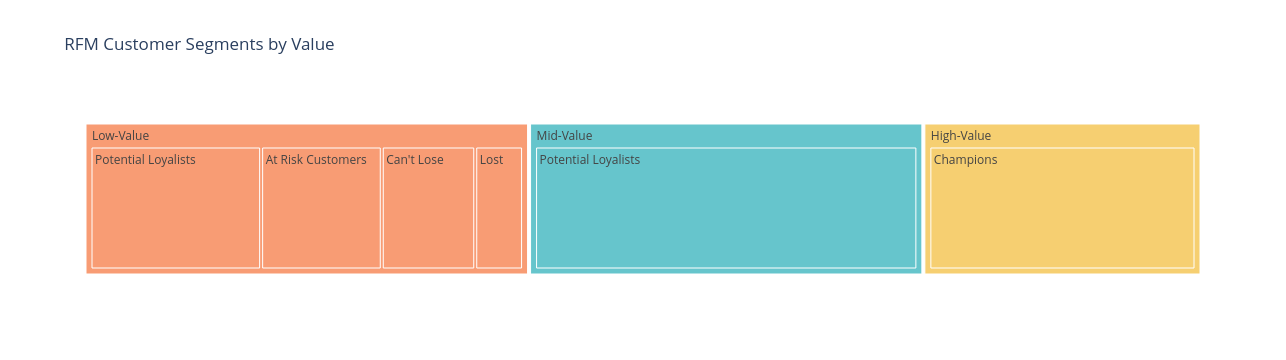

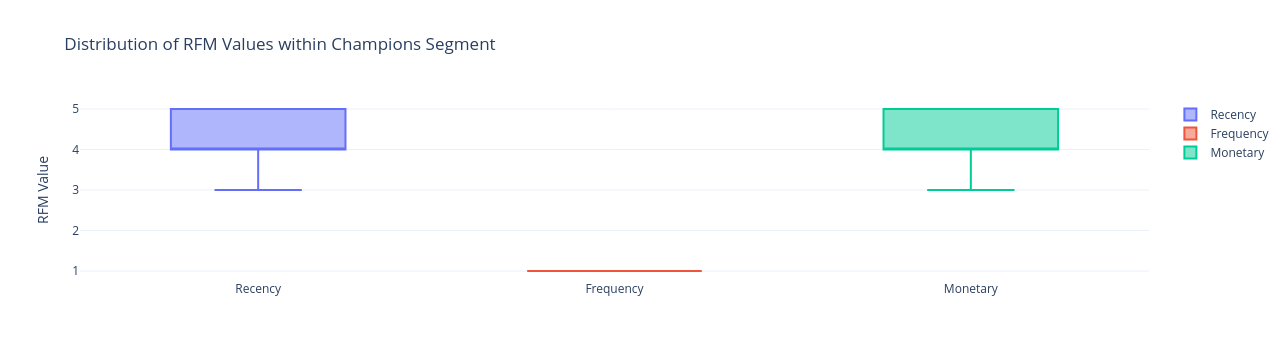

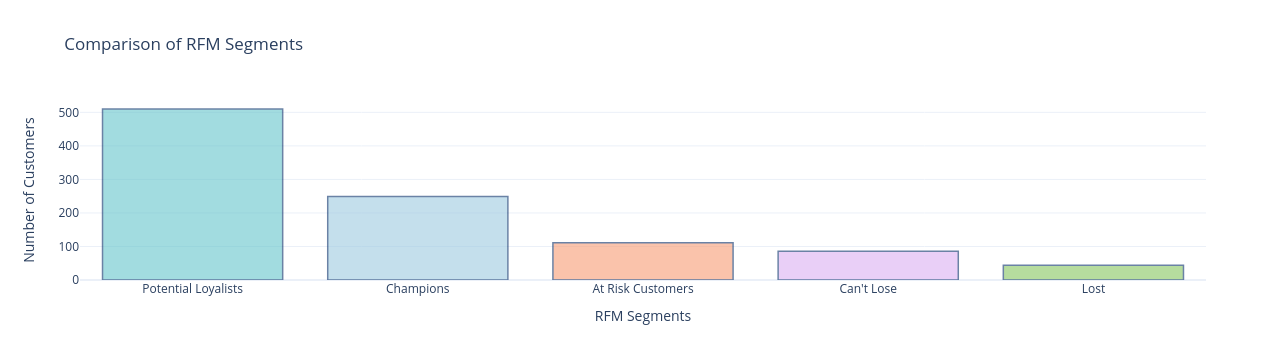

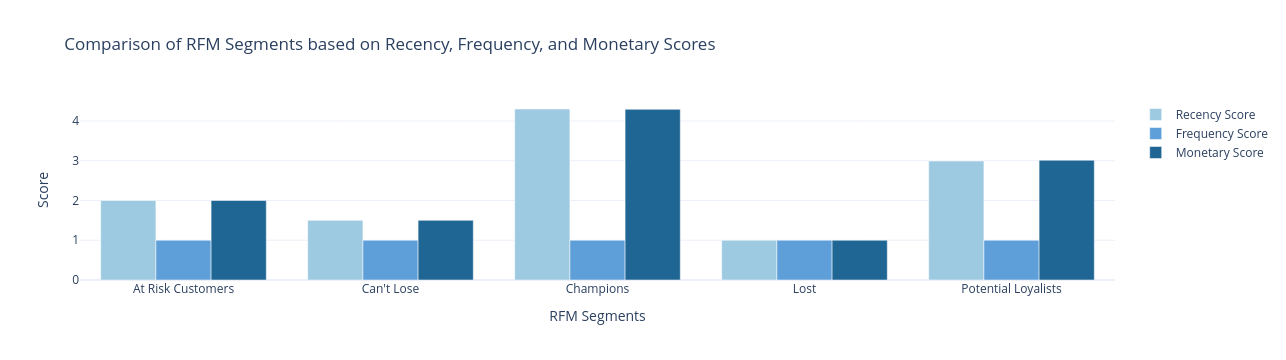

In [36]:
import plotly.express as px
import plotly.graph_objects as go

# Set the Plotly template
import plotly.io as pio
pio.templates.default = "plotly_white"

# 1. Calculate RFM Customer Segments
data['RFM Customer Segments'] = ''

# Assign RFM segments based on the RFM score
data.loc[data['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
data.loc[(data['RFM_Score'] >= 6) & (data['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
data.loc[(data['RFM_Score'] >= 5) & (data['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
data.loc[(data['RFM_Score'] >= 4) & (data['RFM_Score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
data.loc[(data['RFM_Score'] >= 3) & (data['RFM_Score'] < 4), 'RFM Customer Segments'] = "Lost"

# Print the updated data with RFM segments
pd.set_option('display.expand_frame_repr', None)
print(data[['CustomerID', 'RFM Customer Segments']])

# 2. RFM Segment Distribution Treemap
segment_product_counts = data.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count')
segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

fig_treemap_segment_product = px.treemap(segment_product_counts, 
                                         path=['Value Segment', 'RFM Customer Segments'], 
                                         values='Count',
                                         color='Value Segment', color_discrete_sequence=px.colors.qualitative.Pastel,
                                         title='RFM Customer Segments by Value')

# 3. Distribution of RFM Values within Champions Segment (Box Plots)
# Filter the data to include only the customers in the Champions segment
champions_segment = data[data['RFM Customer Segments'] == 'Champions']

fig_box_champions = go.Figure()
fig_box_champions.add_trace(go.Box(y=champions_segment['RecencyScore'], name='Recency'))
fig_box_champions.add_trace(go.Box(y=champions_segment['FrequencyScore'], name='Frequency'))
fig_box_champions.add_trace(go.Box(y=champions_segment['MonetaryScore'], name='Monetary'))

fig_box_champions.update_layout(title='Distribution of RFM Values within Champions Segment',
                                yaxis_title='RFM Value',
                                showlegend=True)

# 4. Comparison of RFM Segments (Bar Chart)
import plotly.colors
pastel_colors = plotly.colors.qualitative.Pastel

segment_counts = data['RFM Customer Segments'].value_counts()

fig_segment_counts = go.Figure(data=[go.Bar(x=segment_counts.index, y=segment_counts.values,
                            marker=dict(color=pastel_colors))])

# Set the color of the Champions segment as a different color
champions_color = 'rgb(158, 202, 225)'
fig_segment_counts.update_traces(marker_color=[champions_color if segment == 'Champions' else pastel_colors[i]
                                for i, segment in enumerate(segment_counts.index)],
                  marker_line_color='rgb(8, 48, 107)',
                  marker_line_width=1.5, opacity=0.6)

fig_segment_counts.update_layout(title='Comparison of RFM Segments',
                  xaxis_title='RFM Segments',
                  yaxis_title='Number of Customers',
                  showlegend=False)

# 5. Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores (Grouped Bar Chart)
segment_scores = data.groupby('RFM Customer Segments')[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].mean().reset_index()


fig_segment_scores = go.Figure()

# Add bars for Recency score
fig_segment_scores.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['RecencyScore'],
    name='Recency Score',
    marker_color='rgb(158,202,225)'
))

# Add bars for Frequency score
fig_segment_scores.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['FrequencyScore'],
    name='Frequency Score',
    marker_color='rgb(94,158,217)'
))

# Add bars for Monetary score
fig_segment_scores.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['MonetaryScore'],
    name='Monetary Score',
    marker_color='rgb(32,102,148)'
))

fig_segment_scores.update_layout(
    title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Score',
    barmode='group',
    showlegend=True)

# Display the figures
fig_treemap_segment_product.show()
fig_box_champions.show()
fig_segment_counts.show()
fig_segment_scores.show()
